# Data Driven Modeling
<hr style="height:3px;border:none;color:stillblue;background-color:black;" />
### PhD seminar series at Chair for Computer Aided Architectural Design (CAAD), ETH Zurich


###### <a href=https://vahidmoosavi.com/> Vahid Moosavi </a>
<hr style="height:1px;border:none;color:stillblue;background-color:black;" />

<a></a>

# Second Session: Introduction to Probability 
<hr style="height:1px;border:none;color:stillblue;background-color:steelblue;" />
<span style="color:steelblue;font-size: 1em;"> 27th Semptember 2016</span>


![](Images/DataDrivenModelingKW.png)

### Topics to be discussed 


**Probability Theory**
* Certainty and Determinism
* Laplace’s demon
* Poncare and the end of determinism
* Deterministic Unpredictability (Chaos Theory and Bifurcation)
* Uncertainty and Randomness
* Fuzziness, vagueness and ambiguity
* Variable and Parameter
* Random Variable
* Probability (Kolmogrov) axioms
* Independent Random Variables 
* Joint Probability 
* Baysian Rules and Conditional Probability
* Probability distributions
* Expected Value
* Variance
* Covariance
* Law of Large Numbers
* Central Limit Theorem



In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
pd.__version__
import sys
import sompylib.sompy as SOM
import sompylib1.sompy as SOM1

%matplotlib inline

### Determinism
* **Starting gradually from 16th century** 
* **Newotonian Mechanics and rapid growth of science**
* **To beiliev in Objective Truth** 
* **Determinism turns to beileve in the truth of equations in describing the underlying mechansim of natural phenomena.**
* **Laplace's Deamon**

# <a></a>
# <a></a>
# <a></a>
# <a></a>
# <a></a>

# but it really works in many systems!

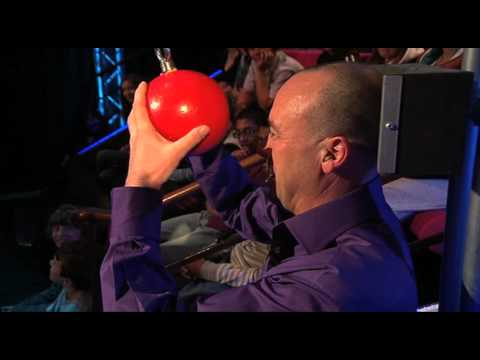

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('EZNpnCd4ZBo',width=700, height=600)

## Now simply a Double Pendulum!

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/78/Double-Pendulum.svg/294px-Double-Pendulum.svg.png)

### still one can write the underlying equations  


![](Images/Double_P.svg)

In [1]:
# Double pendulum formula translated from the C code at
# http://www.physics.usyd.edu.au/~wheat/dpend_html/solve_dpend.c

from numpy import sin, cos
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation

G = 9.8  # acceleration due to gravity, in m/s^2
L1 = 1.0  # length of pendulum 1 in m
L2 = 0.7 # length of pendulum 2 in m
M1 = 1.0  # mass of pendulum 1 in kg
M2 = 1.0  # mass of pendulum 2 in kg


def derivs(state, t):

    dydx = np.zeros_like(state)
    dydx[0] = state[1]

    del_ = state[2] - state[0]
    den1 = (M1 + M2)*L1 - M2*L1*cos(del_)*cos(del_)
    dydx[1] = (M2*L1*state[1]*state[1]*sin(del_)*cos(del_) +
               M2*G*sin(state[2])*cos(del_) +
               M2*L2*state[3]*state[3]*sin(del_) -
               (M1 + M2)*G*sin(state[0]))/den1

    dydx[2] = state[3]

    den2 = (L2/L1)*den1
    dydx[3] = (-M2*L2*state[3]*state[3]*sin(del_)*cos(del_) +
               (M1 + M2)*G*sin(state[0])*cos(del_) -
               (M1 + M2)*L1*state[1]*state[1]*sin(del_) -
               (M1 + M2)*G*sin(state[2]))/den2

    return dydx

# create a time array from 0..100 sampled at 0.05 second steps
dt = 0.05
t = np.arange(0.0, 30, dt)

# th1 and th2 are the initial angles (degrees)
# w10 and w20 are the initial angular velocities (degrees per second)
th1 = 120.0
w1 = 0.0
th2 = -10.0
w2 = 0.0

# initial state
state = np.radians([th1, w1, th2, w2])

# integrate your ODE using scipy.integrate.
y = integrate.odeint(derivs, state, t)

x1 = L1*sin(y[:, 0])
y1 = -L1*cos(y[:, 0])

x2 = L2*sin(y[:, 2]) + x1
y2 = -L2*cos(y[:, 2]) + y1

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.grid()

line, = ax.plot([], [], 'o-r',markersize=3, lw=2)
trace1, = ax.plot([], [], '-', c='r',lw=.4)
trace2, = ax.plot([], [], '-', c='g',lw=.4)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)


def init():
    line.set_data([], [])
    trace1.set_data([], [])
    trace2.set_data([], [])
    time_text.set_text('')
    return line, time_text


def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]

    line.set_data(thisx, thisy)
    trace1.set_data(x1[:i], y1[:i])
    trace2.set_data(x2[:i], y2[:i])
    time_text.set_text(time_template % (i*dt))
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(y)),
                              interval=25, blit=True, init_func=init)

# ani.save('./Images/double_pendulum.mp4', fps=15)
ani.save('./Images/double_pendulum.mp4', fps=15, extra_args=['-vcodec', 'libx264'],dpi=200)
plt.close()

In [2]:
from IPython.display import HTML
HTML("""
<video width="600" height="400" controls>
  <source src="files/Images/double_pendulum.mp4" type="video/mp4">
</video>
""")


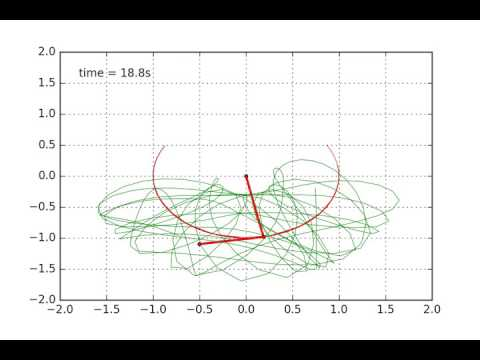

In [4]:
from IPython.display import YouTubeVideo
YouTubeVideo('04mbMblhXog',width=600, height=400)

### In many real world problems, we just observe this kind of behaviours
* Stock market
* buidling energy
* weather
* People's movement patterns

# <a></a>
## What can we say if we don't know the underlying mechanisms or equations?

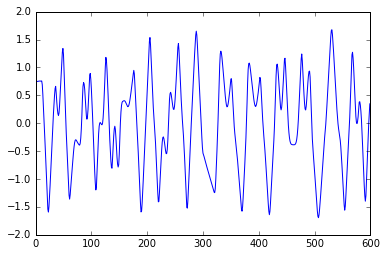

In [5]:
plt.plot(range(len(x2)),x2);

# Limits to Determinism
### Dependency to initial conditions and parameters
#### Bifurcation process

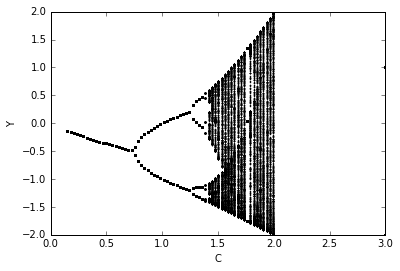

In [6]:

xa=.15
xb=3.

C=np.linspace(xa,xb,num=100)
# print C
iter=range(1000)
Y = C*0+1
YS =  []
for x in iter:
    Y=Y**2-C
# plt.plot(C,Y, '.k', markersize = 2)
for x in iter:
    
    Y = Y**2 - C
    YS.append(Y)
    plt.plot(C,Y, '.k', markersize = 2);

plt.xlabel('C')
plt.ylabel('Y')
plt.show();

C : 1.58939393939


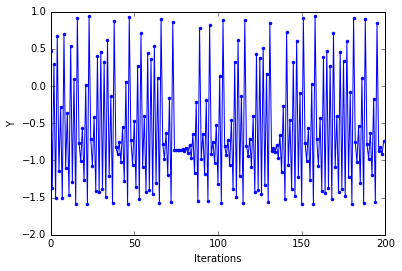

In [7]:
YS = np.asarray(YS)
#Change this parameter and see how the range of possible values is changing
which_c = 50
plt.plot(YS[:,which_c][:200],'.-');
print 'C : {}'.format(C[which_c])
plt.xlabel('Iterations')
plt.ylabel('Y')

### Simulation of Lorenz Attractors 

In [8]:
#Code from: https://jakevdp.github.io/blog/2013/02/16/animating-the-lorentz-system-in-3d/


# import numpy as np
# from scipy import integrate

# # Note: t0 is required for the odeint function, though it's not used here.
# def lorentz_deriv((x, y, z), t0, sigma=10., beta=8./3, rho=28.0):
#     """Compute the time-derivative of a Lorenz system."""
#     return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

# x0 = [1, 1, 1]  # starting vector
# t = np.linspace(0, 3, 1000)  # one thousand time steps
# x_t = integrate.odeint(lorentz_deriv, x0, t)





import numpy as np
from scipy import integrate

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation
%matplotlib inline
N_trajectories = 30


#dx/dt = sigma(y-x)
#dy/dt = x(rho-z)-y
#dz/dt = xy-beta*z


def lorentz_deriv((x, y, z), t0, sigma=10., beta=8./3, rho=28.0):
    """Compute the time-derivative of a Lorentz system."""
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]


# Choose random starting points, uniformly distributed from -15 to 15
np.random.seed(1)
x0 = -15 + 30 * np.random.random((N_trajectories, 3))

# Solve for the trajectories
t = np.linspace(0, 10, 1000)
x_t = np.asarray([integrate.odeint(lorentz_deriv, x0i, t)
                  for x0i in x0])

# Set up figure & 3D axis for animation
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection='3d')
ax.axis('off')
plt.set_cmap(plt.cm.YlOrRd_r)
# choose a different color for each trajectory
colors = plt.cm.jet(np.linspace(0, 1, N_trajectories))

# set up lines and points
lines = sum([ax.plot([], [], [], '-', c=c)
             for c in colors], [])
pts = sum([ax.plot([], [], [], 'o', c=c)
           for c in colors], [])

# prepare the axes limits
ax.set_xlim((-25, 25))
ax.set_ylim((-35, 35))
ax.set_zlim((5, 55))

# set point-of-view: specified by (altitude degrees, azimuth degrees)
ax.view_init(30, 0)

# initialization function: plot the background of each frame
def init():
    for line, pt in zip(lines, pts):
        line.set_data([], [])
        line.set_3d_properties([])

        pt.set_data([], [])
        pt.set_3d_properties([])
    return lines + pts

# animation function.  This will be called sequentially with the frame number
def animate(i):
    # we'll step two time-steps per frame.  This leads to nice results.
    i = (2 * i) % x_t.shape[1]

    for line, pt, xi in zip(lines, pts, x_t):
        x, y, z = xi[:i].T
        line.set_data(x, y)
        line.set_3d_properties(z)

        pt.set_data(x[-1:], y[-1:])
        pt.set_3d_properties(z[-1:])

    ax.view_init(30, 0.3 * i)
    fig.canvas.draw()
    return lines + pts

# instantiate the animator.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=500, interval=10, blit=True)

# Save as mp4. This requires mplayer or ffmpeg to be installed
anim.save('./Images/lorentz_attractor.mp4', fps=15, extra_args=['-vcodec', 'libx264'],dpi=200)

plt.close()

In [9]:
from IPython.display import HTML
HTML("""
<video width="600" height="400" controls>
  <source src="files/Images/lorentz_attractor.mp4" type="video/mp4">
</video>
""")

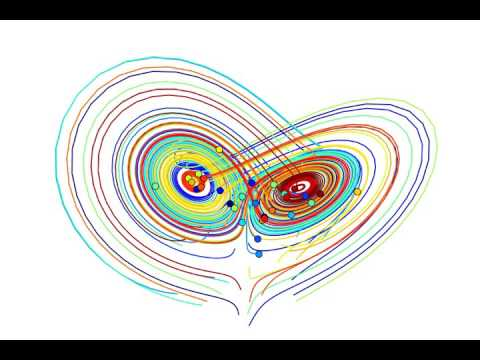

In [5]:
from IPython.display import YouTubeVideo
YouTubeVideo('JZoGO0MrZPA',width=400, height=400)

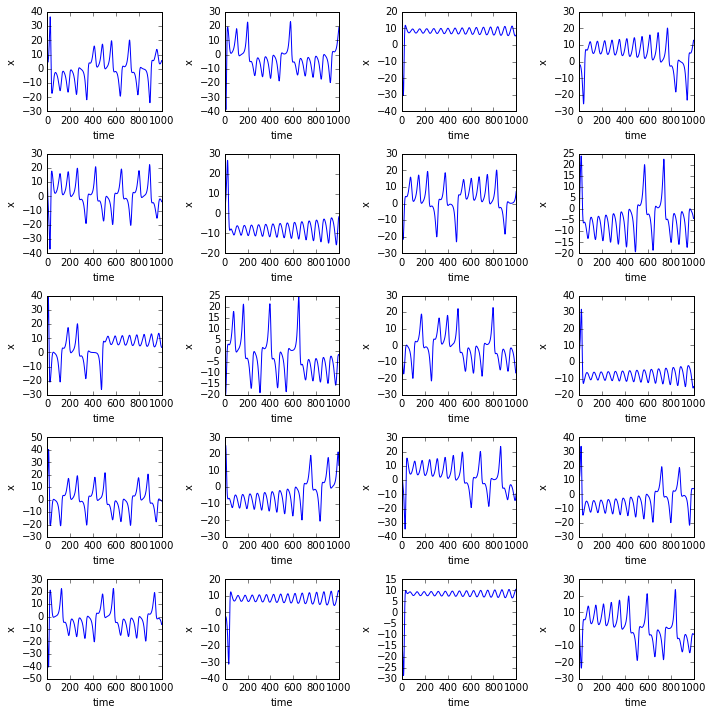

In [10]:
# No regularity in the behavior 
# The effect of initial value
figure =plt.figure(figsize=(10,10))
for i in range(20):
    plt.subplot(5,4,i+1);
    plt.plot(x_t[i,:,1]);
    plt.xlabel('time')
    plt.ylabel('x')
plt.tight_layout();

## Non-Predictable Determinism --- > End of Determinism?!
* **Dependency to initial conditions and parameters**
* **Butterfly Effect**
* **Henri Poncare's work on N-Body Problem 1880s**
* **Lorenz Attractors 1960s**
* Further readings:
    * * Deterministic Nonperiodic Flow: #Paper: http://eaps4.mit.edu/research/Lorenz/Deterministic_63.pdf 
    * Heisenberg's uncertainty principle
    * "God Doesn't play dice" 
    * Is randomness the nature of things or due to lack of understanding?
    * Is it appropriate to look at probability and statistics as some sorts of pragmatism?
    * Important people from the History of Probability and Statistics: http://www.economics.soton.ac.uk/staff/aldrich/Figures.htm

# <a></a>

# <a></a>
# Now Uncertainty and Randomness

![](https://upload.wikimedia.org/wikipedia/commons/7/77/Nuvola_apps_atlantik.png)

# Important terms
* ## Variable
    * a symbolization of specific number, vector, matrix or even a function, which takes a range of values
    * Then, we have **discrete** or **continuous** variables, depending on the range of values
    * **Dependent** and **independent** variables
        $$y = 2x + sin(x) $$
* ## Parameter or Constant
    * A Variable, which we assume is not varying (i.e. is constant) in our experiment
* ## Random Variable (contribution of probability theory)
    * To add likelihood or chance (or formally probability) to any values of a variable
* ## Fuzziness, vagueness and ambiguity (possibility theory)


# <a></a>
# <a></a>

# Some important principles of Probability Theory
* ## Probability (Kolmogrov) axioms
https://en.wikipedia.org/wiki/Probability_axioms
    
    *  **First axiom**

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/ac12b631af7065f7f811d265b249a030f37484c8)
    
    * **Second axiom** 
    * sum of all probabilities
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/1f0f26c0fa97e701b5fd9459d1b7fe3b6f4ea326)
    
    * Third axiom
    * probability of disjoint elements is the sum of their individual probabilities
 ![](https://wikimedia.org/api/rest_v1/media/math/render/svg/47f22fe03df467b1d20785e5026bac39fabd9edc)
 
    * **Consequences**
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/76817e6fd9cc41a3e844f540590132c36cf9bade)
    
## <a></a>
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/efd8ec693a89b5ea1c222660fefe5239565e6551)

## <a></a>

 ![](https://wikimedia.org/api/rest_v1/media/math/render/svg/024906557ab6af34620cb2ac901fd61911372944)   
## <a></a>


* **Some set theoretical intuitions** 
    * venn diagrams from set theory
    

## <a></a>
![](Images/venn.gif)

* **Conditional Probability**
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/c7f0ff7bcd50dd11514f9f02b1273dab360a4cef)

## <a></a>
![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9c/Probability_tree_diagram.svg/424px-Probability_tree_diagram.svg.png)

## <a></a>

* **Independent variables**
    * results of coin toss and rolling a dice
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/fd349a98748a1e64afd94e53e11e5cc1e3996d4e)
## <a></a>

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/7676b3c8f234867216f16c94eaa893354b1bca6a)
## <a></a>

* **Law of total probability**
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/1f629ea8dda22bcc5fa6afe2d066ad753e215f2b)
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/a3fd649bac7848b022c2d1453bcd77070ab9a788)
# <a></a>


* **Bayes Rule**
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/b1078eae6dea894bd826f0b598ff41130ee09c19)
# <a></a>

![](https://upload.wikimedia.org/wikipedia/commons/thumb/b/bf/Bayes_theorem_visualisation.svg/600px-Bayes_theorem_visualisation.svg.png)

# Further readings
* A First Course on Probability by Sheldon Ross
* Richard Feynman intro to probability theory: http://www.feynmanlectures.caltech.edu/I_06.html

# <a></a>


## Random Variable
* ### A random variable is always coming with a likelihood function (probability density)
* ### discrete random variable 
    * examples: Coin:{'head','tail'},  
    * Dice:{1,...,6}
    * **Probability mass function** indicates the likelihood of each discrete event

 ![](https://wikimedia.org/api/rest_v1/media/math/render/svg/289f3e31c4faf8cbf2c78ebdec04e3994092c6e5)
* ### continuous random variable
    * temperature in a building
    * Height of a random person
    * **Probability Density function** indicates the likelihood of each discrete event
  
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/45fd7691b5fbd323f64834d8e5b8d4f54c73a6f8)

* **Cumulative distribution function**

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/4080d882376474e2d20b1f5d942f890539308c6f)

<img src="
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/237edf4296a8ef4a946134c613b04b250d2de5be)

* **joint functions**

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/2925d7334ee04f933179892c7f407efaacd33123)


## <a></a>


![](https://wikimedia.org/api/rest_v1/media/math/render/svg/f8d052b8b354ed30ad25da7f4bc8c3e87cdc71ea)

* **Expected value**

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/ef6f4efe003752f5353cfb1ed00235f374455805)
## <a></a>


![](https://wikimedia.org/api/rest_v1/media/math/render/svg/caa946e993c976ed0f95e60748fcd7afce6bb2ff)
* **Variance**

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/55622d2a1cf5e46f2926ab389a8e3438edb53731)
## <a></a>

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/c2ace8c9ac8568598540df05d0db70c4e957192b)

* **CoVariance**
#### more of use in statistics 
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/7120384a1c843727d9589e2b33dbc33901d14f42)
## <a></a>
![](https://wikimedia.org/api/rest_v1/media/math/render/svg/7331bb9b6e36128d1d9cb735b11b65427929105d)
### Therefore, two independent (uncorelated) variables have a covariance of zero and not the other way necessarily
### Covariance is the heart of many ML and statistical learning methods such as PCA.

## Known probability functions
![](Images/PDFSandPMFS.png)
<a></a>
* There are many more : https://en.wikipedia.org/wiki/List_of_probability_distributions

# Gaussian (Normal) distribution
![](https://upload.wikimedia.org/wikipedia/commons/thumb/1/1a/Boxplot_vs_PDF.svg/598px-Boxplot_vs_PDF.svg.png)
## <a></a>
### <center> PDF </center>
![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/720px-Normal_Distribution_PDF.svg.png)
## <a></a>
### <center>  CDF </center>
![](https://upload.wikimedia.org/wikipedia/commons/thumb/c/ca/Normal_Distribution_CDF.svg/720px-Normal_Distribution_CDF.svg.png)

# Nevertheless, we use computers! 

In [6]:
from scipy.integrate import quad

#Now CDF
#P(a<=x<=b) for N(m,s)

# Gaussian Distribution
def Guassianf(m,s,x):
    return 1/(s*np.sqrt(2*np.pi)) * np.exp(-np.power((x-m),2)/(2*s*s))

def integrand(x,m,s,Guassianf):
    return Guassianf(m,s,x)
a = -6
b= 6
m = 0
s = 1
P, err = quad(integrand, a, b,args=(m,s,Guassianf))
print P

0.999999998027


In [12]:
#Expected Value and Variance

from scipy.integrate import quad


def integrand(x,m,s,Guassianf):
    return x*Guassianf(m,s,x)

a = -1*np.inf
b= np.inf
m = 2
s = 10
mu, err = quad(integrand, a, b,args=(m,s,Guassianf))

def integrand(x,m,s,Guassianf):
    return x*x*Guassianf(m,s,x)

mu2, err = quad(integrand, a, b,args=(m,s,Guassianf))

sigma2 = mu2- mu*mu

print mu,sigma2


2.0 100.0


In [13]:
from scipy.integrate import quad

# Uniform Distribution
def f(a,b):
    return 1/float(b-a)

def integrand(x,a,b,f):
    return x*f(a,b)

a = 0
b= 10

mu, err = quad(integrand, a, b,args=(a,b,f))

def integrand(x,a,b,f):
    return x*x*f(a,b)

mu2, err = quad(integrand, a, b,args=(a,b,f))

sigma2 = mu2- mu*mu

print mu,sigma2


5.0 8.33333333333


## Excercise
**Calculate the mean and standard deviation of Exponential probability density functions.**
# <a></a>
# <a></a>
# <a></a>


# But before going further
* ### we talked about end of determinism, and transition from knowing to learning but 
* ### It seems that there is again some sort of repetition of learning and knowing withing probability and statistics

In [14]:
import datetime
import pandas as pd
import pandas.io.data
import numpy as np
from matplotlib import pyplot as plt
import sys
import getngrams as ng# from pandas import Series, DataFrame
# import xkcd as fun
%matplotlib inline
# kw = ['Mainframe Computer','Personal Computer','Sensor','Computer Network','Internet', 'Data Mining','Pervasive Computing',
#       'Smart Phone','Communication Technology','Simulation','Micro Simulation','Web 2.0'
#       ]

kw = ['Probability','Statistics','Machine Learning','stochastics']
A = pd.DataFrame()
for i in range(len(kw)):
    try: 
        tmp = ng.runQuery('-nosave -noprint -startYear=1800 -smoothing=3 -endYear=2008 -caseInsensitive '+kw[i])
#         A['year']=tmp.year.values[:]
        weights = tmp.values[:,1:]
        mx  = np.max(weights,axis=0)
        mn  = np.min(weights,axis=0)
        R = mx-mn
        weights = (weights-mn)/R
        tmp.ix[:,1:]=weights
        A[kw[i]]=tmp.values[:,1]

    except:
        print kw[i], 'not enough data'


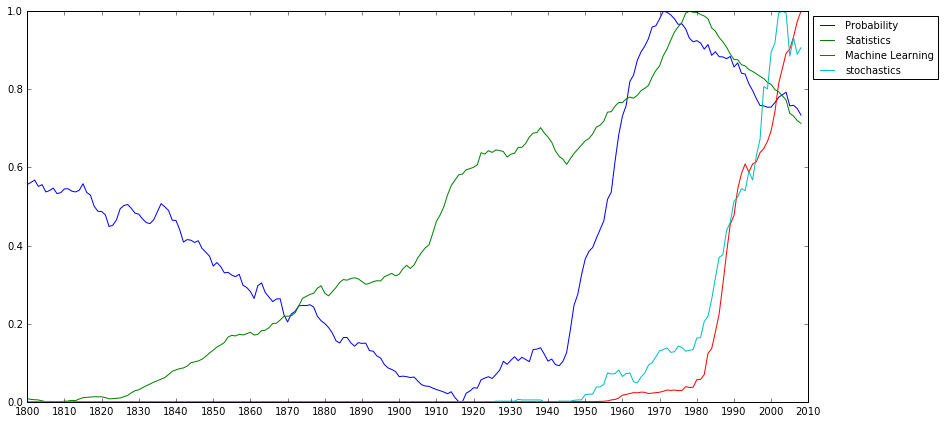

In [15]:
fig = plt.figure()
for i in range(len(kw)):
    try: 
        plt.plot(tmp.year,A[kw[i]],linewidth=1,label=kw[i])
        xticks = np.arange(tmp.year[0],2011,10).astype(int)
        plt.xticks(xticks)
#         plt.yticks([])
    except:
        print kw[i], 'not enough data'

# A.plot(A.year,A.columns[1:],label='Date',colormap='jet')
# 
plt.legend(loc='best',bbox_to_anchor = (1.0, 1.0),fontsize = 'medium')
fig.set_size_inches(14,7)

## Seems now it makes sense to use the term of Learning in Machine Learning!

### Further readings
* Statistical Modeling: The Two Cultures by Leo Breiman http://www.stat.uchicago.edu/~lekheng/courses/191f09/breiman.pdf
* all the fights between statisticians and ML guys!  
    * http://statweb.stanford.edu/~jhf/ftp/dm-stat.pdf
    * http://statweb.stanford.edu/~tibs/stat315a/glossary.pdf

# Next sessions we talk about these estimation methods in details...

### The answer to the excersice

In [16]:

from scipy.integrate import quad

# Exponential 
def f(m,x):
    return lam*np.exp(-1*lam*x)

def integrand(x,lam,f):
    return x*f(lam,x)

a = 0
b= np.inf
lam = 2
mu, err = quad(integrand, a, b,args=(lam,f))

def integrand(x,lam,f):
    return x*x*f(lam,x)

mu2, err = quad(integrand, a, b,args=(lam,f))

sigma2 = mu2- mu*mu

print mu,sigma2


0.5 0.25
